# Project 2 — Multi‑Feature Linear Regression (x₁, x₂ → y)
## Optimization Form — Gradient Descent (Multi‑Feature)
Same idea as Project 1, but now with two weights.

## Scalar Gradient Descent (Project 1 style)

-  The model becomes a plane 𝑦^ = 𝑤1𝑥1 + 𝑤2𝑥2 + 𝑏
 
This is the simplest possible neural network:

- inputs: 
𝑥1, 𝑥2
- weights: 
𝑤1 ,𝑤2
- bias: 𝑏


In [1]:
import numpy as np

# Feature 1: square footage
x1 = np.array([180, 200, 230, 260, 280, 300, 325, 375, 425, 480, 488, 510, 560, 600])

# Feature 2: number of rooms
x2 = np.array([4, 4, 5, 5, 6, 6, 6, 7, 7, 8, 8, 8, 9, 10])

# Target: price
y  = np.array([122, 120, 170, 180, 240, 238, 246, 320, 361, 370, 376, 390, 410, 470])

# Combine into matrix
X = np.column_stack([x1, x2])


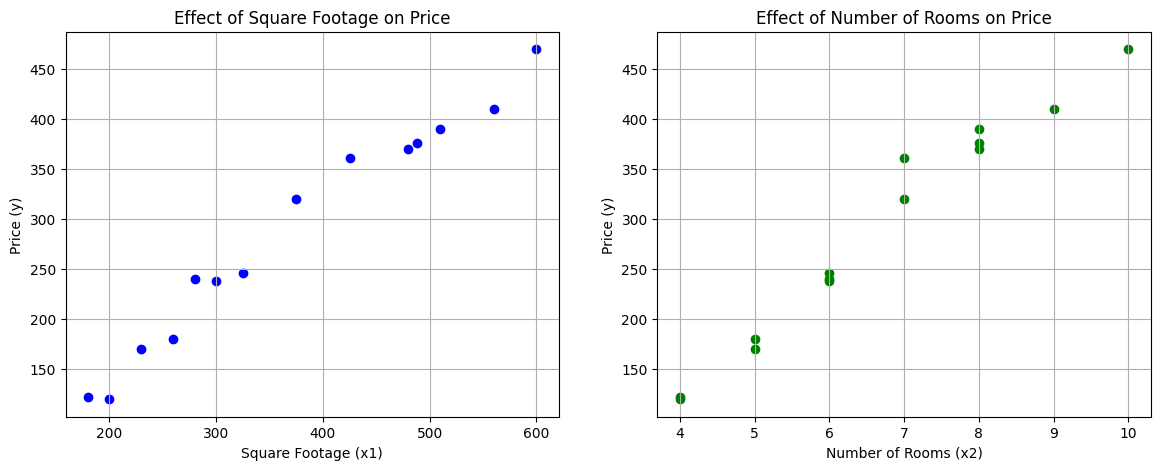

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.scatter(x1, y, color='blue')
plt.xlabel("Square Footage (x1)")
plt.ylabel("Price (y)")
plt.title("Effect of Square Footage on Price")
plt.grid(True)

plt.subplot(1,2,2)
plt.scatter(x2, y, color='green')
plt.xlabel("Number of Rooms (x2)")
plt.ylabel("Price (y)")
plt.title("Effect of Number of Rooms on Price")
plt.grid(True)

plt.show()


In [ ]:
# Scalar (non-vectorized) gradient descent
w1 = 0.0
w2 = 0.0
b  = 0.0
lr = 1e-7
n = len(y)

for epoch in range(20000):
    y_hat = w1*x1 + w2*x2 + b
    error = y_hat - y.flatten()

    dw1 = (2/n) * np.sum(error * x1)
    dw2 = (2/n) * np.sum(error * x2)
    db  = (2/n) * np.sum(error)

    w1 -= lr * dw1
    w2 -= lr * dw2
    b  -= lr * db

print(f"wieght 1 : {w1}")
print(f"wieght 2 : {w2}")
print(f"bias : {b}")

# Vectorized Gradient Descent (Neural‑Network Style)
**Updates all weights at once**

# Vectorized gradient descent
X = np.column_stack([x1, x2])   # (n × 2)
y = y.reshape(-1, 1)            # (n × 1)

w = np.zeros((2, 1))            # (2 × 1)
b = 0.0

lr = 1e-7
n = len(y)

for epoch in range(20000):
    y_hat = X @ w + b           # (n×2)(2×1) → (n×1)
    error = y_hat - y           # (n×1)

    dw = (2/n) * (X.T @ error)  # (2×n)(n×1) → (2×1)
    db = (2/n) * np.sum(error)  # scalar

    w -= lr * dw
    b -= lr * db

print(f"wieght : {w}")
print(f"bias : {b}")


One forward pass using a dot product

One gradient vector

One update rule

This is literally how neural networks train
The vectorized version is a neural network layer.

Inputs → dot product → bias → output → gradient → update.

The only difference between this and a transformer is:

more weights

more layers

nonlinear activations

This is the moment where this naturally transitions into logistic regression, XOR, and backprop.
